# Import Libraries and Load Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DwiAnggaraNS/AI-MelangkahDariTengah-2024/main/Dataset_Qatar_Airways_Cleaned.csv')
df.head()

,Unnamed: 0,Date Published,Rating,Max Rating,Title,Author,Country,Date,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified,Sentiment_using_textblob,From,To,Via
0,0.00000,2024-03-02,1.0,10,“marred by inconveniences”,Mary Le,United Kingdom,2024-03-02,The delay of my flight from Haneda to Doha ca...,Solo Leisure,Economy Class,Tokyo to London Heathrow via Doha,March 2024,no,A380,0.000000,Positive,Tokyo,London,Doha
1,1190.62058,2024-02-29,1.0,10,Qatar Airways customer review,Brian English,United Kingdom,2024-02-29,They convinced me that I needed to pay $1500...,Couple Leisure,Business Class,Doha to Montreal,February 2024,no,A380,1.000000,Positive,Doha,Montreal,Direct
2,2.00000,2024-02-29,1.0,10,"""no attempt to address our complaint""",Wayne Burgess,Australia,2024-02-29,I have sent 5 emails and have only received ...,Business,Economy Class,Doha to Perth,October 2015,no,A380,1.000000,Negative,Doha,Perth,Direct
3,5.00000,2024-02-20,10.0,10,"""remarkable experience""",Qandeel Ahtasham,United Kingdom,2015-01-05,12th February 2024 From check in to get onboa...,Family Leisure,Business Class,Bangkok to Doha,October 2015,no,A380,1.000000,Positive,Bangkok,Doha,Direct
4,1190.62058,2024-02-20,10.0,10,“incredible service”,N Foster,United States,2015-01-05,"Remarkable experience. Great tasting food, l...",Family Leisure,Economy Class,Bangkok to Doha,October 2015,no,A380,0.918216,Positive,Bangkok,Doha,Direct


# EDA

## Ekonomi & Premium Ekonomi: Titik Rawan Layanan Qatar Airways

### NVisualize Percentage of Sentiment in Every Class

<Figure size 1000x600 with 0 Axes>

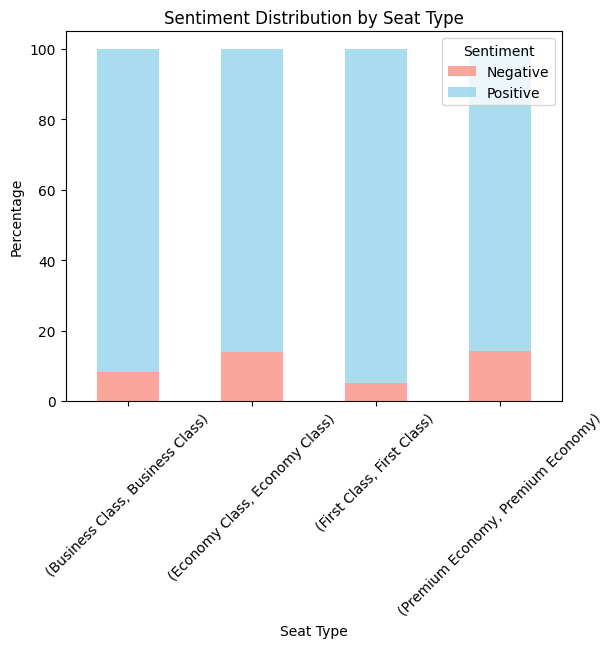

In [ ]:
# Menghitung distribusi sentimen dalam persentase
sentiment_counts = df.groupby(['Seat Type', 'Sentiment_using_textblob']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

# Plotting
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], alpha=0.7)
plt.title('Sentiment Distribution by Seat Type')
plt.xlabel('Seat Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

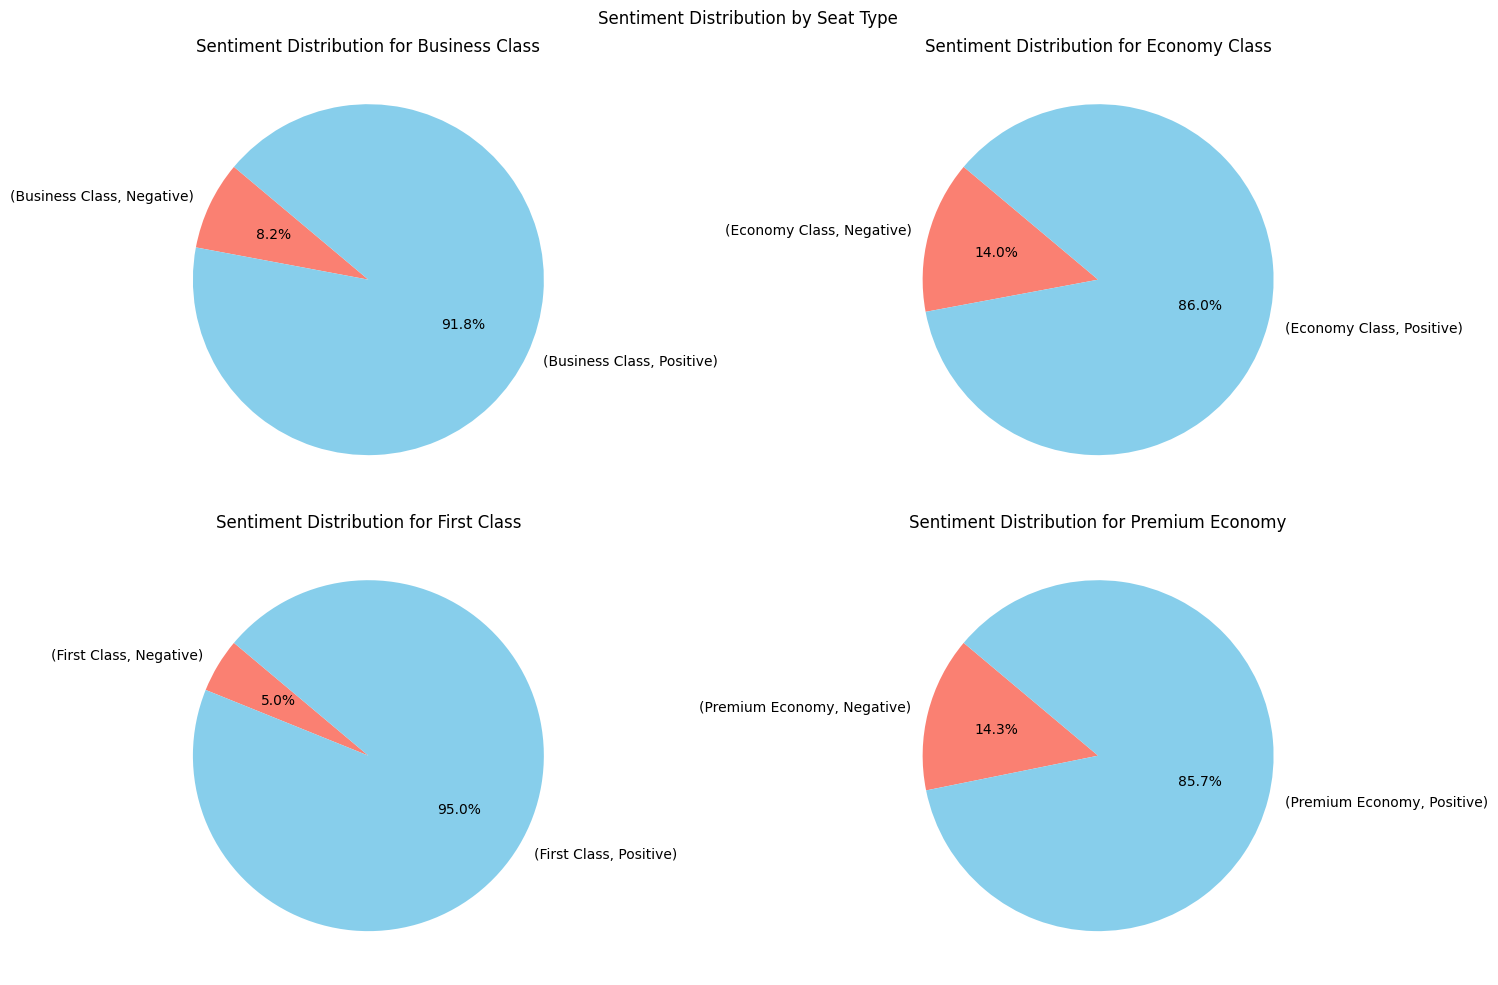

Perbandingan jumlah sentimen (persentase) untuk setiap kelas tiket:
Seat Type        Seat Type        Sentiment_using_textblob
Business Class   Business Class   Negative                     8.166969
                                  Positive                    91.833031
Economy Class    Economy Class    Negative                    14.047077
                                  Positive                    85.952923
First Class      First Class      Negative                     5.000000
                                  Positive                    95.000000
Premium Economy  Premium Economy  Negative                    14.285714
                                  Positive                    85.714286
dtype: float64


In [ ]:
# Menghitung distribusi sentimen dalam persentase
sentiment_counts = df.groupby(['Seat Type', 'Sentiment_using_textblob']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# Plotting pie chart untuk setiap Seat Type
seat_types = sentiment_counts.index.levels[0]  # Mendapatkan semua jenis kelas tiket

plt.figure(figsize=(15, 10))

for i, seat_type in enumerate(seat_types, 1):
    plt.subplot(2, 2, i)  # Menentukan layout grid untuk setiap pie chart
    seat_sentiment = sentiment_counts.loc[seat_type]
    seat_sentiment.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['salmon', 'skyblue'])
    plt.title(f'Sentiment Distribution for {seat_type}')
    plt.ylabel('')  # Menghapus label sumbu y agar lebih rapi

plt.suptitle('Sentiment Distribution by Seat Type')
plt.tight_layout()
plt.show()

print("Perbandingan jumlah sentimen (persentase) untuk setiap kelas tiket:")
print(sentiment_counts)


### Visualize Word Cloud for "Negative" Data in Economy and Premium Economy


Seat Types with Negative Sentiment above 10%:
 Seat Type
Economy Class      14.047077
Premium Economy    14.285714
Name: count, dtype: float64


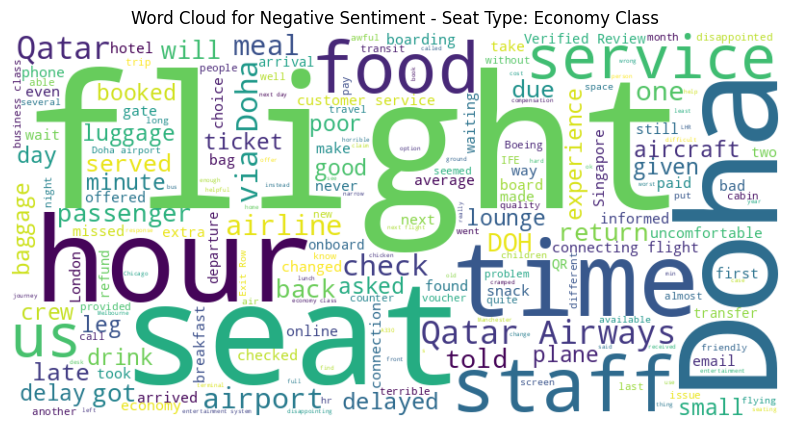


Top 30 Words in Negative Reviews for Seat Type 'Economy Class':
  flight: 300
  doha: 240
  qatar: 148
  service: 105
  seats: 104
  staff: 98
  food: 89
  time: 88
  seat: 85
  t: 84
  hours: 83
  us: 80
  airport: 80
  airways: 79
  via: 72
  check: 64
  flights: 58
  3: 51
  back: 50
  one: 49
  2: 47
  told: 47
  return: 47
  next: 46
  will: 45
  doh: 44
  got: 43
  hour: 43
  5: 42
  leg: 41


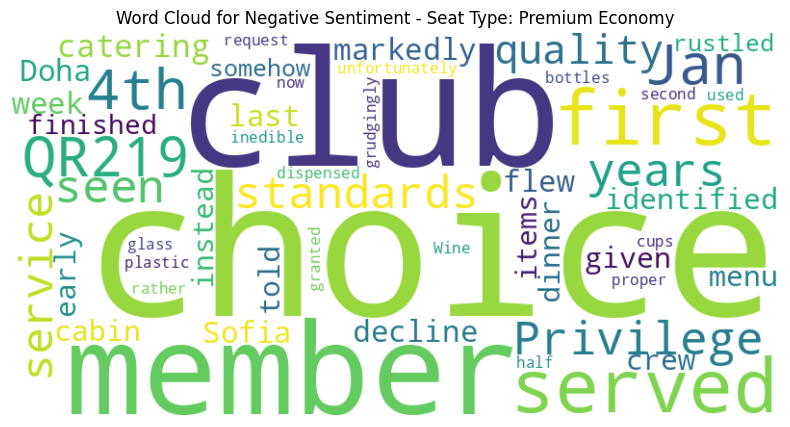


Top 30 Words in Negative Reviews for Seat Type 'Premium Economy':
  choice: 3
  club: 2
  member: 2
  served: 2
  first: 2
  qr219: 1
  4th: 1
  jan: 1
  privilege: 1
  10: 1
  years: 1
  seen: 1
  standards: 1
  service: 1
  quality: 1
  catering: 1
  markedly: 1
  decline: 1
  flew: 1
  sofia: 1
  doha: 1
  last: 1
  week: 1
  identified: 1
  cabin: 1
  crew: 1
  instead: 1
  given: 1
  early: 1
  menu: 1
Top 30 words for each seat type with negative sentiment have been saved to 'Top_30_Words_Negative_Reviews.xlsx'.


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re
import pandas as pd

# Calculate the percentage of negative sentiment per seat type
total_reviews_per_seat = df['Seat Type'].value_counts()
negative_reviews_per_seat = df[df['Sentiment_using_textblob'] == 'Negative']['Seat Type'].value_counts()

# Calculate the percentage of negative reviews for each seat type
negative_percentage_per_seat = (negative_reviews_per_seat / total_reviews_per_seat * 100).dropna()

# Filter seat types with more than 10% negative sentiment
negative_seat_type_above_threshold = negative_percentage_per_seat[negative_percentage_per_seat > 10]
print("\nSeat Types with Negative Sentiment above 10%:\n", negative_seat_type_above_threshold)

# Filter negative reviews for seat types that meet the criteria
negative_reviews = df[(df['Sentiment_using_textblob'] == 'Negative') &
                      (df['Seat Type'].isin(negative_seat_type_above_threshold.index))]

# Define stop words
stop_words = set(STOPWORDS)

# Create an Excel writer to save top words for each seat type in separate sheets
with pd.ExcelWriter('Top_30_Words_Negative_Reviews.xlsx') as writer:
    for seat_type in negative_seat_type_above_threshold.index:
        # Get all review text for the specific seat type
        seat_reviews = negative_reviews[negative_reviews['Seat Type'] == seat_type]['Review Body']

        # Combine all reviews into a single text
        all_reviews_text = ' '.join(seat_reviews)

        # Clean text and split into words
        words = re.findall(r'\b\w+\b', all_reviews_text.lower())

        # Remove stop words from word list
        filtered_words = [word for word in words if word not in stop_words]

        # Count word frequency
        word_counts = Counter(filtered_words)

        # Generate Word Cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(all_reviews_text)

        # Display Word Cloud for the seat type
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Negative Sentiment - Seat Type: {seat_type}')
        plt.show()

        # Get the top 30 words
        top_30_words = word_counts.most_common(30)

        # Display top words in the console
        print(f"\nTop 30 Words in Negative Reviews for Seat Type '{seat_type}':")
        for word, count in top_30_words:
            print(f"  {word}: {count}")

        # Save top 30 words to Excel sheet
        df_top_words = pd.DataFrame(top_30_words, columns=['Word', 'Count'])
        df_top_words.to_excel(writer, sheet_name=seat_type, index=False)

print("Top 30 words for each seat type with negative sentiment have been saved to 'Top_30_Words_Negative_Reviews.xlsx'.")


# Clustering Route Performance using K-Means Clustering and Elbow Method


Sebelum filtering: 870 rute
Setelah filtering (min 3 reviews): 77 rute


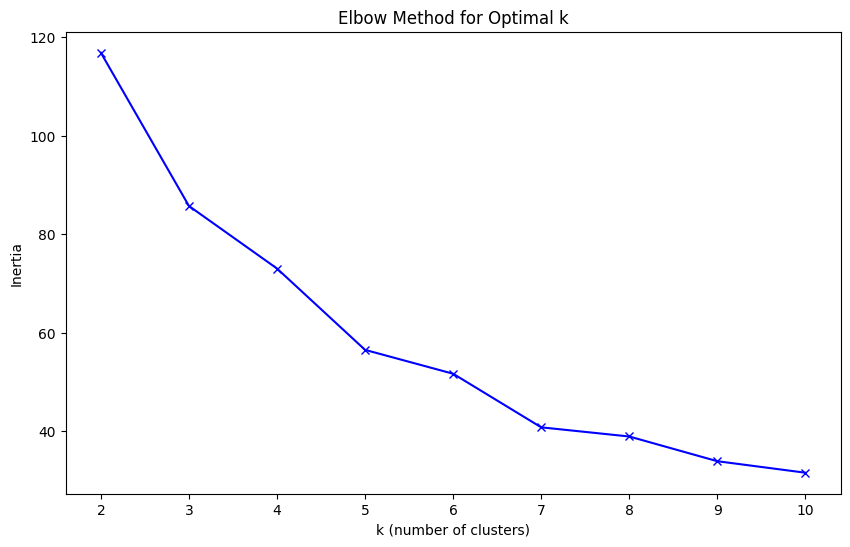


Jumlah cluster optimal: 2


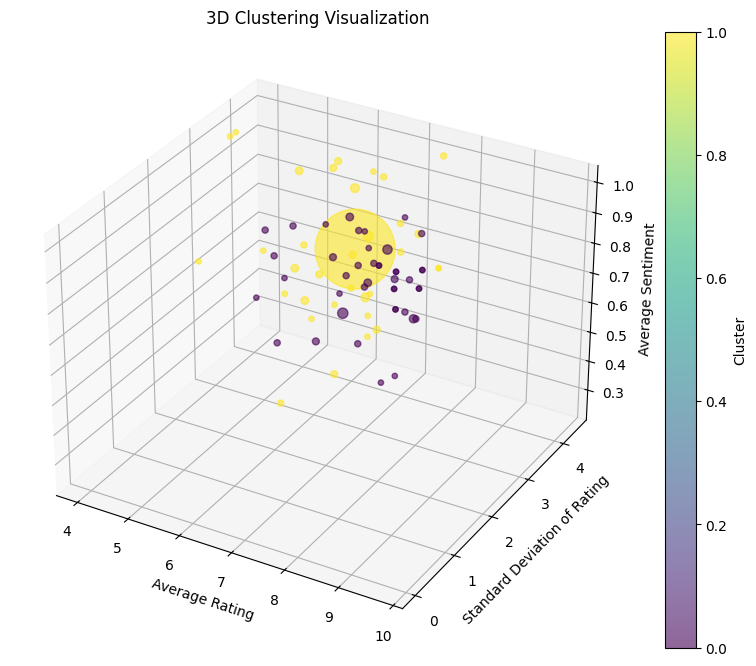


Karakteristik Setiap Cluster:
--------------------------------------------------

Cluster 1
Jumlah Rute: 34
Rating Rata-rata: 6.50
Standar Deviasi Rating: 3.03
Sentimen Rata-rata: 0.77
Persentase Rute Direct: 76.47%
Persentase Rute Transit: 23.53%

Cluster 0
Jumlah Rute: 43
Rating Rata-rata: 8.30
Standar Deviasi Rating: 1.26
Sentimen Rata-rata: 0.96
Persentase Rute Direct: 55.81%
Persentase Rute Transit: 44.19%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Data Preprocessing dengan Threshold
def preprocess_route_data(df, min_reviews=5):

      # Convert sentiment to numeric
    df['Sentiment_Score'] = df['Sentiment_using_textblob'].map({
        'Positive': 1,
        'Negative': 0
    })
    # Membuat fitur agregat per rute
    route_metrics = df.groupby(['From', 'To', 'Via']).agg({
        'Rating': ['mean', 'std', 'count'],
        'Sentiment_Score': ['mean']
    }).reset_index()

    # Flatten multi-level columns
    route_metrics.columns = ['From', 'To', 'Via', 'avg_rating', 'std_rating', 'review_count', 'avg_sentiment']

    # Filter rute berdasarkan minimum reviews
    print(f"\nSebelum filtering: {len(route_metrics)} rute")
    route_metrics = route_metrics[route_metrics['review_count'] >= min_reviews]
    print(f"Setelah filtering (min {min_reviews} reviews): {len(route_metrics)} rute")

    # Handle NaN values
    route_metrics['std_rating'] = route_metrics['std_rating'].fillna(0)

    return route_metrics

# 2. Menentukan jumlah cluster optimal menggunakan elbow method
def find_optimal_clusters(X, max_clusters=10):
    inertias = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    # Plot elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), inertias, 'bx-')
    plt.xlabel('k (number of clusters)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

    # Calculate elbow point using second derivative
    second_derivative = np.diff(np.diff(inertias))
    elbow_point = np.argmax(second_derivative) + 2

    return elbow_point

# 3. Clustering dengan variabel utama dan visualisasi 3D
def cluster_routes(route_metrics):
    features = ['avg_rating', 'std_rating', 'avg_sentiment']

    # Prepare features
    X = route_metrics[features].copy()

    # Standardisasi
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Tentukan jumlah cluster optimal
    n_clusters = find_optimal_clusters(X_scaled)
    print(f"\nJumlah cluster optimal: {n_clusters}")

    # Aplikasikan K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    route_metrics['cluster'] = kmeans.fit_predict(X_scaled)

    # Visualisasi 3D untuk interpretasi cluster
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(route_metrics['avg_rating'],
                         route_metrics['std_rating'],
                         route_metrics['avg_sentiment'],
                         c=route_metrics['cluster'],
                         s=route_metrics['review_count'] * 5,  # Ukuran berdasarkan jumlah review
                         cmap='viridis', alpha=0.6)
    ax.set_xlabel('Average Rating')
    ax.set_ylabel('Standard Deviation of Rating')
    ax.set_zlabel('Average Sentiment')
    plt.title('3D Clustering Visualization')
    plt.colorbar(scatter, label='Cluster')
    plt.show()

    return route_metrics

# 4. Analisis Detail Cluster
def analyze_clusters_detailed(route_metrics):
    cluster_analysis = {}

    print("\nKarakteristik Setiap Cluster:")
    print("-" * 50)
    i = 0

    for cluster in route_metrics['cluster'].unique():
        cluster_routes = route_metrics[route_metrics['cluster'] == cluster]

        # Hitung statistik cluster
        direct_routes = cluster_routes[cluster_routes['Via'] == "Direct"]
        transit_routes = cluster_routes[cluster_routes['Via'] != "Direct"]
        direct_percentage = len(direct_routes) / len(cluster_routes) * 100
        transit_percentage = len(transit_routes) / len(cluster_routes) * 100

        cluster_stats = {
            'size': len(cluster_routes),
            'avg_rating': cluster_routes['avg_rating'].mean(),
            'std_rating': cluster_routes['std_rating'].mean(),
            'avg_sentiment': cluster_routes['avg_sentiment'].mean(),
            'direct_percentage': direct_percentage,
            'transit_percentage': transit_percentage,
            'routes': cluster_routes[['From', 'To', 'Via', 'avg_rating', 'std_rating', 'avg_sentiment']].to_dict('records')
        }

        print(f"\nCluster {cluster}")
        print(f"Jumlah Rute: {cluster_stats['size']}")
        print(f"Rating Rata-rata: {cluster_stats['avg_rating']:.2f}")
        print(f"Standar Deviasi Rating: {cluster_stats['std_rating']:.2f}")
        print(f"Sentimen Rata-rata: {cluster_stats['avg_sentiment']:.2f}")
        print(f"Persentase Rute Direct: {cluster_stats['direct_percentage']:.2f}%")
        print(f"Persentase Rute Transit: {cluster_stats['transit_percentage']:.2f}%")

        cluster_analysis[i] = cluster_stats
        i+=1

    return cluster_analysis

# Main execution
def analyze_problematic_routes(df, min_reviews=5):
    # 1. Preprocessing dengan threshold
    route_metrics = preprocess_route_data(df, min_reviews)

    # 2. Clustering dan Visualisasi
    route_metrics = cluster_routes(route_metrics)

    # 3. Analisis Detail
    cluster_analysis = analyze_clusters_detailed(route_metrics)

    return route_metrics, cluster_analysis

# Contoh penggunaan
# df = pd.read_csv('qatar_airways_reviews.csv')
route_metrics, cluster_analysis = analyze_problematic_routes(df, min_reviews=3)


In [ ]:
print(cluster_analysis[1])

{'size': 43, 'avg_rating': 8.30340162226658, 'std_rating': 1.2640728101745315, 'avg_sentiment': 0.9639887244538408, 'direct_percentage': 55.81395348837209, 'transit_percentage': 44.18604651162791, 'routes': [{'From': 'Amsterdam', 'To': 'Bangkok', 'Via': 'Doha', 'avg_rating': 6.568637803590285, 'std_rating': 1.7636217462314612, 'avg_sentiment': 1.0}, {'From': 'Auckland', 'To': 'Doha', 'Via': 'Direct', 'avg_rating': 9.0, 'std_rating': 1.0, 'avg_sentiment': 1.0}, {'From': 'Bangkok', 'To': 'Frankfurt', 'Via': 'Doha', 'avg_rating': 7.212425202393523, 'std_rating': 2.315367425253953, 'avg_sentiment': 1.0}, {'From': 'Colombo', 'To': 'Doha', 'Via': 'Direct', 'avg_rating': 7.0, 'std_rating': 2.0, 'avg_sentiment': 1.0}, {'From': 'Copenhagen', 'To': 'Bangkok', 'Via': 'Doha', 'avg_rating': 7.568637803590285, 'std_rating': 2.064136830301328, 'avg_sentiment': 1.0}, {'From': 'Copenhagen', 'To': 'Ho Chi Minh', 'Via': 'Doha', 'avg_rating': 8.666666666666666, 'std_rating': 1.1547005383792515, 'avg_senti

In [ ]:
for label, stats in cluster_analysis.items():
    print(f"\nCluster Label: {label}")
    print(f"Jumlah Rute: {stats['size']}")
    print(f"Rating Rata-rata: {stats['avg_rating']:.2f}")
    print(f"Standar Deviasi Rating: {stats['std_rating']:.2f}")
    print(f"Sentimen Rata-rata: {stats['avg_sentiment']:.2f}")
    print(f"Persentase Rute Direct: {stats['direct_percentage']:.2f}%")
    print(f"Persentase Rute Transit: {stats['transit_percentage']:.2f}%")

    print("\nDaftar Rute dalam Cluster:")
    for route in stats['routes']:
        print(f" - Dari: {route['From']}, Ke: {route['To']}, Via: {route['Via']}")
        print(f"   Rating Rata-rata: {route['avg_rating']:.2f}, Standar Deviasi: {route['std_rating']:.2f}, Sentimen: {route['avg_sentiment']:.2f}")



Cluster Label: 0
Jumlah Rute: 34
Rating Rata-rata: 6.50
Standar Deviasi Rating: 3.03
Sentimen Rata-rata: 0.77
Persentase Rute Direct: 76.47%
Persentase Rute Transit: 23.53%

Daftar Rute dalam Cluster:
 - Dari: Adelaide, Ke: Doha, Via: Direct
   Rating Rata-rata: 4.76, Standar Deviasi: 3.32, Sentimen: 0.67
 - Dari: Amsterdam Airport Schiphol, Ke: Bangkok, Via: Doha
   Rating Rata-rata: 5.85, Standar Deviasi: 2.47, Sentimen: 0.67
 - Dari: Athens, Ke: Doha, Via: Direct
   Rating Rata-rata: 6.76, Standar Deviasi: 2.54, Sentimen: 0.67
 - Dari: Bangkok, Ke: Doha, Via: Direct
   Rating Rata-rata: 7.23, Standar Deviasi: 2.43, Sentimen: 0.89
 - Dari: Bangkok, Ke: Edinburgh, Via: Doha
   Rating Rata-rata: 6.78, Standar Deviasi: 3.02, Sentimen: 1.00
 - Dari: Bangkok, Ke: London, Via: Doha
   Rating Rata-rata: 6.88, Standar Deviasi: 3.18, Sentimen: 0.62
 - Dari: Bangkok, Ke: Milan, Via: Doha
   Rating Rata-rata: 4.00, Standar Deviasi: 3.61, Sentimen: 1.00
 - Dari: Brussels, Ke: Bangkok, Via: Doha